# Customer Attrition

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided. 

In the business context, "churn" refers both to customers' migration and to their loss of value. So, "churn rate" refers, on the one hand, to the percentage of customers who end their relation with the organization, or, on the other hand, to the customers who still receive their services, but not as much or not as often as they used to. Current organizations face therefore a huge challenge: to be able to anticipate to customers’ abandon in order to retain them on time, reducing this way costs and risks and gaining efficiency and competitivity. There are in the market advanced analytics tools and applications, especially designed to analyze in depth the enormous amount of data inside the organizations, and to make predictions based on the information obtained from analyzing and exploring those data. They aim to put at the service of marketing departments and agencies –and of all business users- the necessary weapons to:

* Detect soon which customers are about to abandon and to know them in depth, answering to questions such as: Who are they? or How do they behave?
* Know the real value of the potential loss of those customers, with the aim of establishing priorities and distributing business efforts and resources efficiently, optimizing resources and maximizing the value of the current customers’ portfolio.
* Put into practice personalized retention plans in order to reduce or avoid their migration, increasing the capability to react and anticipating to possible non-predicted fugues. (https://en.wikipedia.org/wiki/Customer_attrition)

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline

# Data Overview and Manipulation

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Rows     : " , df.shape[0])
print("Columns  : " , df.shape[1])
print("\nFeatures : \n" , df.columns.tolist())
print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n", df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Column Explaination:
* <b>gender</b> = Whether the customer is a male or a female
* <b>SeniorCitizen</b> = Whether the customer is a senior citizen or not (1, 0)
* <b>Partner</b> = Whether the customer has a partner or not (Yes, No)
* <b>Dependents</b> = Whether the customer has dependents or not (Yes, No)
* <b>tenure</b> = Number of months the customer has stayed with the company
* <b>PhoneService</b> = Whether the customer has a phone service or not (Yes, No)
* <b>MultipleLines</b> = Whether the customer has multiple lines or not (Yes, No, No phone service)
* <b>InternetService</b> = Customer’s internet service provider (DSL, Fiber optic, No)
* <b>OnlineSecurity</b> = Whether the customer has online security or not (Yes, No, No internet service)
* <b>OnlineBackup</b> = Whether the customer has online backup or not (Yes, No, No internet service)
* <b>DeviceProtection</b> = Whether the customer has device protection or not (Yes, No, No internet service)
* <b>TechSupport</b> = Whether the customer has tech support or not (Yes, No, No internet service)
* <b>StreamingTV</b> = Whether the customer has streaming TV or not (Yes, No, No internet service)
* <b>StreamingMovies</b> = Whether the customer has streaming movies or not (Yes, No, No internet service)
* <b>Contract</b> = The contract term of the customer (Month-to-month, One year, Two year)
* <b>PaperlessBilling</b> = Whether the customer has paperless billing or not (Yes, No)
* <b>PaymentMethod</b> = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* <b>MonthlyCharges</b> = The amount charged to the customer monthly
* <b>TotalCharges</b> = The total amount charged to the customer

In [5]:
#Find invalid value 
df[df['TotalCharges'] == ' ']['TotalCharges'].count()

11

In [6]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Blank value of TotalCharge have tenure = 0 which means these customer not paid yet. So I will replace this value with 0

In [7]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",0)

#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)


#replace values
cols = ["Partner", "Churn", "PhoneService", "Dependents", "PaperlessBilling"]

for col in cols:
    df[col] = df[col].replace({"Yes":1,"No":0})

# 0 for male and 1 for female
df['gender'] = df['gender'].replace({"Male": 0, "Female": 1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


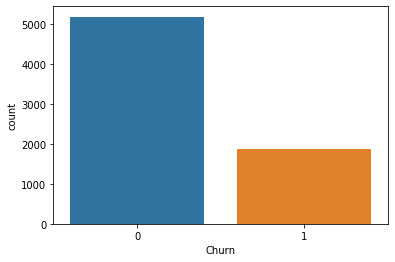

In [8]:
sns.countplot(x = "Churn", data= df)
plt.show()

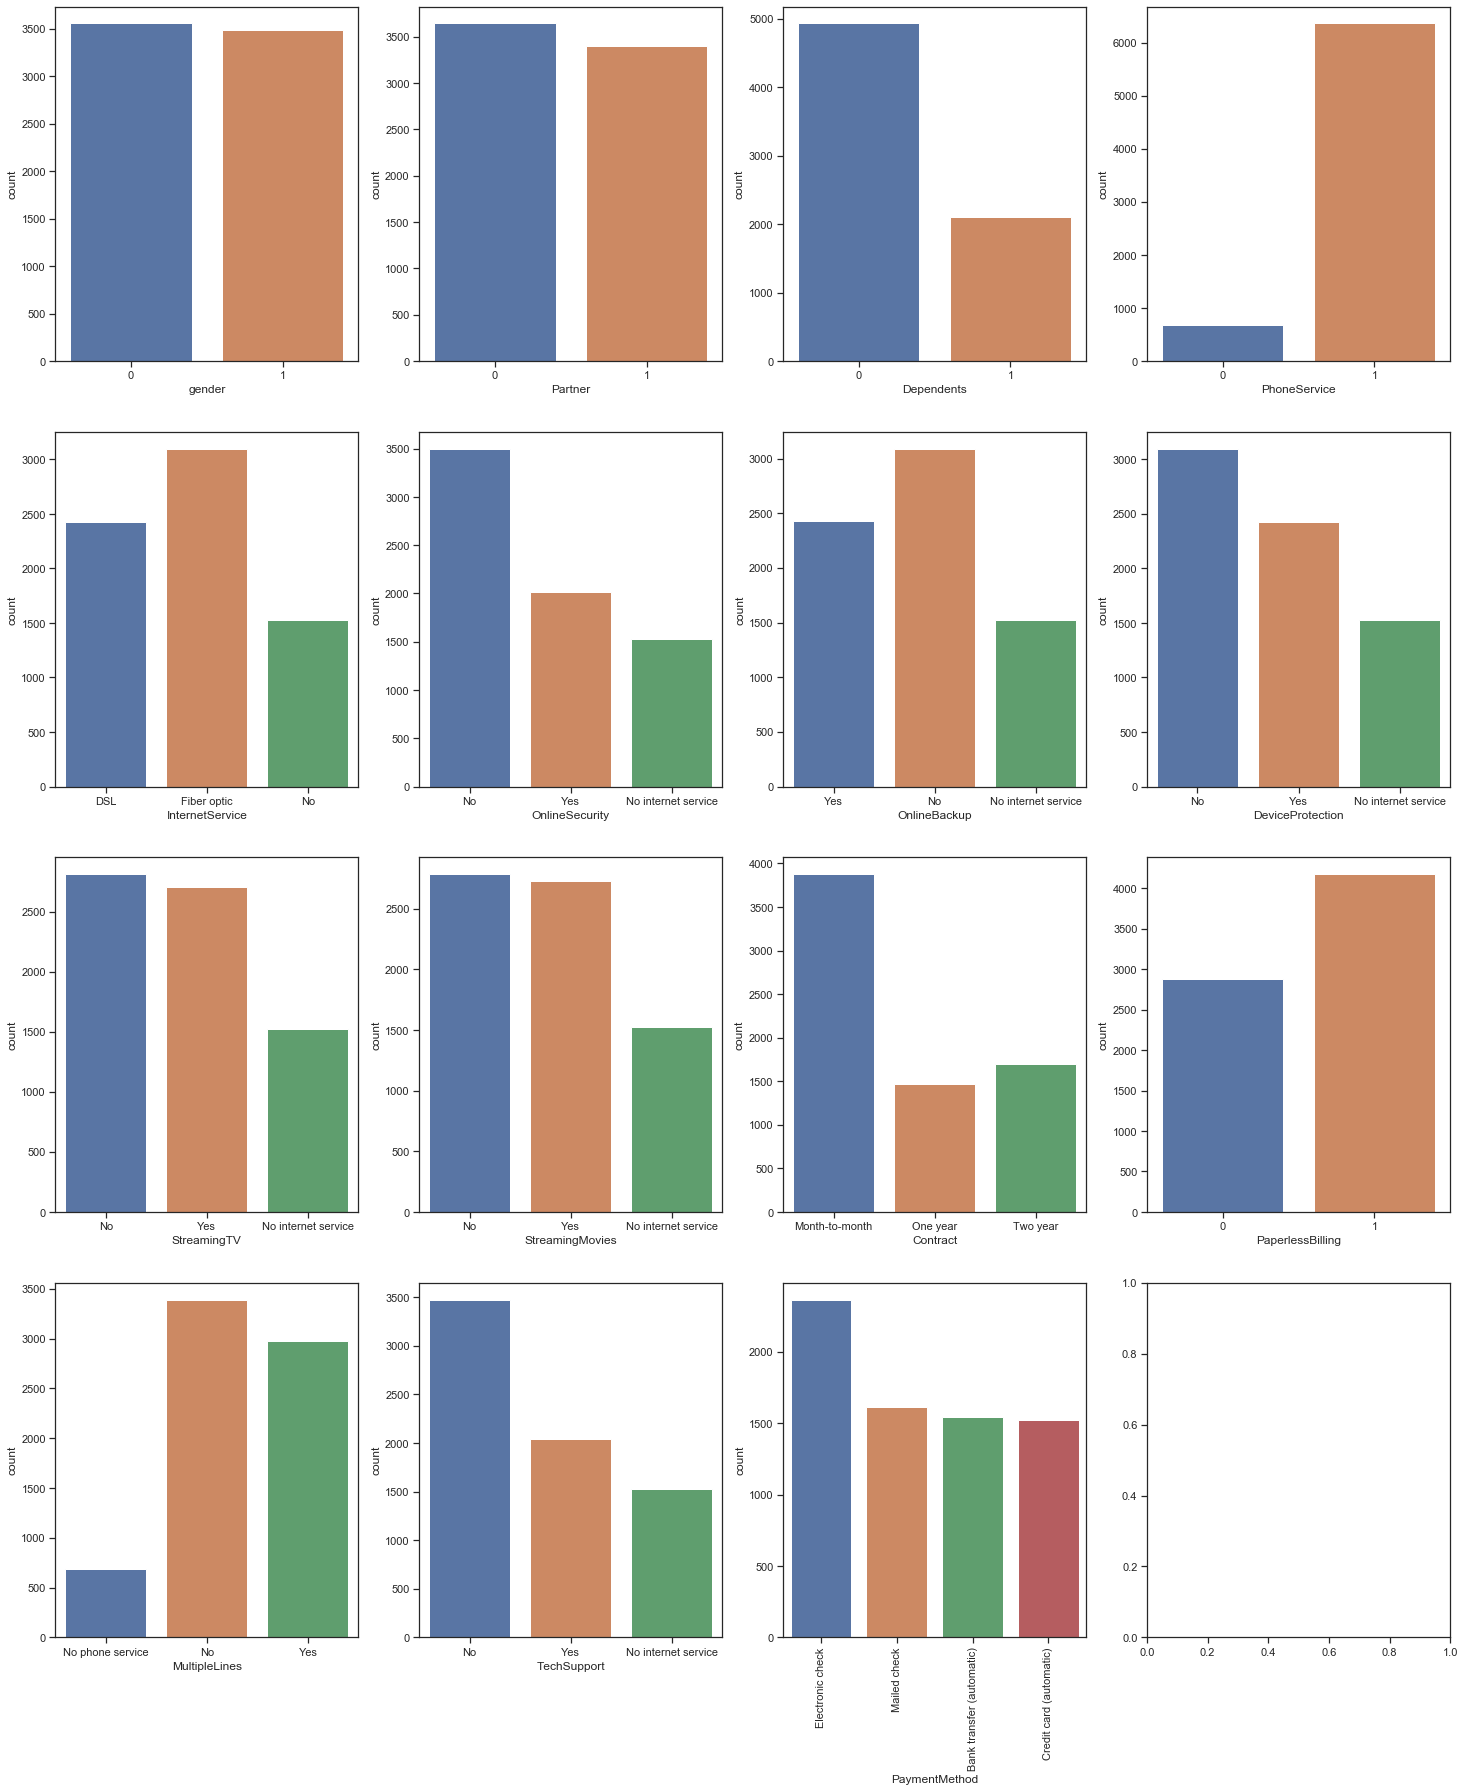

In [9]:
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 4,ncols = 4,figsize = (25,30))

sns.countplot(x = "gender", data = df, ax=axes[0][0])
sns.countplot(x = "Partner", data = df, ax=axes[0][1])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = df, ax=axes[0][3])

sns.countplot(x = "InternetService", data = df, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[1][3])

sns.countplot(x = "StreamingTV", data = df, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[2][1])
sns.countplot(x = "Contract", data = df, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[2][3])

sns.countplot(x = "MultipleLines", data = df, ax=axes[3][0])
sns.countplot(x = "TechSupport", data = df, ax=axes[3][1])
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[3][2])

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show(fig)

In [10]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65


In [11]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [12]:
# One hot encoding for column with more than 2 category
cols2 = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
         "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
X_encoded = pd.get_dummies(X, columns=cols2)
X_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [13]:
sum(y)/len(y)

0.2653698707936959

In [14]:
from sklearn.preprocessing import MinMaxScaler


x = X_encoded[["tenure","MonthlyCharges","TotalCharges"]].values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_encoded[["tenure","MonthlyCharges","TotalCharges"]] = pd.DataFrame(x_scaled)

X_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,1,0.115423,0.003437,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,0.385075,0.217564,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,1,0.354229,0.012453,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,0.239303,0.211951,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,1,0.521891,0.017462,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,0.662189,0.229194,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0.845274,0.847792,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.152778,0,1,0.112935,0.039892,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.055556,1,1,0.558706,0.035303,0,...,1,0,0,1,0,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 4, stratify=y) #stratify used to maintain the same percentage of churn
sum(y_train)/len(y_train)

0.2654297614539947

In [17]:
sum(y_test)/len(y_test)

0.26519023282226006

In [18]:
classifiers = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')]]

predictions_df = pd.DataFrame(columns=('classifier', 'Recall', 'f1', 'Accuracy'))
#predictions_df['actual_labels'] = y_test

i = 0
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    
    #predictions_df[name.strip(" :")] = predictions
    predictions_df.loc[i] = [name.strip(" :"), recall, f1, acc]
    i += 1

predictions_df

C:\Users\marse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,classifier,Recall,f1,Accuracy
0,DecisionTree,0.486081,0.487648,0.729131
1,RandomForest,0.479657,0.539110,0.782510
2,Naive Bayes,0.839400,0.598473,0.701306
3,KNeighbours,0.535332,0.545852,0.763771
4,SVM,0.498929,0.571078,0.801249
5,Neural Network,0.543897,0.562569,0.775696
6,LogisticRegression,0.567452,0.616279,0.812606
7,ExtraTreesClassifier,0.477516,0.527187,0.772856
8,AdaBoostClassifier,0.535332,0.596659,0.808064
9,GradientBoostingClassifier,0.548180,0.605201,0.810335


#### Model with highest accuracy
LogisticRegression = 81.26%
<br>
GradientBoostingClassifier = 81.03%
<br>
AdaBoostClassifier = 80.81%

#### Model with highest f1
LogisticRegression = 0.62
<br>
GradientBoostingClassifier = 0.61
<br>
Naive Bayes = 0.60

#### Model with highest recall
Naive Bayes = 0.84
<br>
Neural network = 0.59
<br>
Logistic Regression = 0.57

#### Model 1: Logistic Regression

From sklearn documentation:
* For small datasets, <b>‘liblinear’</b> is a good choice, whereas <b>‘sag’</b> and <b>‘saga’</b> are faster for large ones.

* For multiclass problems, only <b>‘newton-cg’</b>, <b>‘sag’</b>, <b>‘saga’</b> and <b>‘lbfgs’</b> handle multinomial loss; <b>‘liblinear’</b> is limited to one-versus-rest schemes.

In [39]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'C': np.logspace(-4,2,10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ],
    'max_iter':[100,500,1000,5000]
}

optimal_params = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs = 10,
    cv=3
)

optimal_params.fit(X_train, y_train)

C:\Users\marse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=10,
             param_grid={'C': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                         'max_iter': [100, 500, 1000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
        

In [40]:
optimal_params.best_params_
# {'C': 21.54434690031882, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

{'C': 21.54434690031882, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

acc:  0.8103350369108461
f1:  0.6143187066974596
recall:  0.569593147751606


C:\Users\marse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


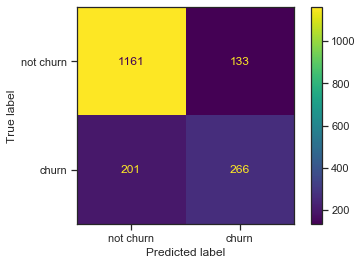

In [50]:
LR = LogisticRegression(penalty='l1' , max_iter=100, C=21.54434690031882, solver='saga').fit(X_train,y_train) #C, smaller values specify stronger regularization.
predictions = LR.predict(X_test)

print('acc: ', accuracy_score(y_test, predictions))
print('f1: ', f1_score(y_test, predictions))
print('recall: ', recall_score(y_test, predictions))
plot_confusion_matrix(LR, X_test, y_test, values_format='d', display_labels=['not churn', 'churn'])

#### Model 2: GradientBoost

In [22]:
param_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.03, 0.1, 1],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'max_depth':[3,4,5]
}

optimal_params = GridSearchCV(
    estimator= GradientBoostingClassifier(subsample=0.9, random_state=10),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs = 10,
    cv=3
)

optimal_params.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [23]:
optimal_params.best_params_
# {'criterion': 'friedman_mse','learning_rate': 0.03,'loss': 'exponential','max_depth': 3}

{'criterion': 'friedman_mse',
 'learning_rate': 0.03,
 'loss': 'exponential',
 'max_depth': 3}

acc:  0.8018171493469619
f1:  0.5642946317103621
recall:  0.48394004282655245


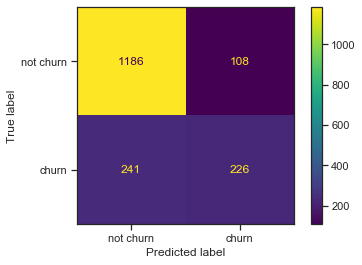

In [25]:
GBC = GradientBoostingClassifier(loss='exponential' , learning_rate=0.03, criterion='friedman_mse', max_depth=3).fit(X_train,y_train)
predictions = GBC.predict(X_test)

print('acc: ', accuracy_score(y_test, predictions))
print('f1: ', f1_score(y_test, predictions))
print('recall: ', recall_score(y_test, predictions))
plot_confusion_matrix(GBC, X_test, y_test, values_format='d', display_labels=['not churn', 'churn'])

#### Model 3: Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

acc:  0.7013060760931289
f1:  0.5984732824427481
recall:  0.8394004282655246


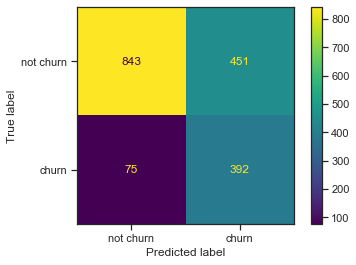

In [38]:
GNB = GaussianNB().fit(X_train,y_train)
predictions = GNB.predict(X_test)

print('acc: ', accuracy_score(y_test, predictions))
print('f1: ', f1_score(y_test, predictions))
print('recall: ', recall_score(y_test, predictions))
plot_confusion_matrix(GNB, X_test, y_test, values_format='d', display_labels=['not churn', 'churn'])

#### Model 4: XGBoost

In [36]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic")
clf_xgb.fit(X_train, y_train, verbose=True, 
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)] )

[0]	validation_0-aucpr:0.65923
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.66490
[2]	validation_0-aucpr:0.66810
[3]	validation_0-aucpr:0.66994
[4]	validation_0-aucpr:0.66443
[5]	validation_0-aucpr:0.67677
[6]	validation_0-aucpr:0.67755
[7]	validation_0-aucpr:0.67448
[8]	validation_0-aucpr:0.67155
[9]	validation_0-aucpr:0.67335
[10]	validation_0-aucpr:0.67012
[11]	validation_0-aucpr:0.67381
[12]	validation_0-aucpr:0.67008
[13]	validation_0-aucpr:0.67231
[14]	validation_0-aucpr:0.67150
[15]	validation_0-aucpr:0.66921
[16]	validation_0-aucpr:0.66864
Stopping. Best iteration:
[6]	validation_0-aucpr:0.67755



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

acc:  0.8069278818852924
f1:  0.5961995249406175
recall:  0.5374732334047109


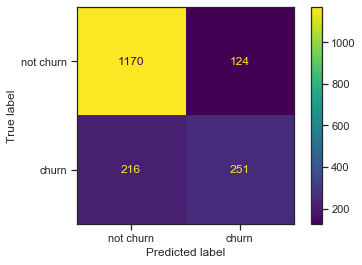

In [37]:
predictions = clf_xgb.predict(X_test)

print('acc: ', accuracy_score(y_test, predictions))
print('f1: ', f1_score(y_test, predictions))
print('recall: ', recall_score(y_test, predictions))
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['not churn', 'churn'])

In [59]:
'''
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 0.3, 1],
    'gamma': [0, 0.3, 1],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [1,3,5]
}

# result = {'gamma': 1,'learning_rate': 0.3,'max_depth': 3,'reg_lambda': 1,'scale_pos_weight': 1}
'''

param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [0.03,0.1,0.3],
    'gamma': [0.3,1,3],
    'reg_lambda': [0,0.3,1],
    'scale_pos_weight': [0.3, 1, 3]
}
# result = {'gamma': 3,'learning_rate': 0.3,'max_depth': 2,'reg_lambda': 0.3,'scale_pos_weight': 3}


optimal_params = GridSearchCV(
    estimator= xgb.XGBClassifier(objective="binary:logistic",
                                 sub_sample=0.9,
                                 colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs = 10,
    cv=10
)

optimal_params.fit(X_train, y_train,
                   verbose =False,
                   early_stopping_rounds=10,
                   eval_metric = 'aucpr',
                   eval_set = [(X_test, y_test)] )

[16:22:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     sub_sample=0.9, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [60]:
optimal_params.best_params_

{'gamma': 3,
 'learning_rate': 0.3,
 'max_depth': 4,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

In [34]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic",
                            gamma= 3,
                            learning_rate= 0.3,
                            max_depth= 2,
                            reg_lambda= 0.3,
                            scale_pos_weight= 3,
                            sub_sample=0.9,
                            colsample_bytree=0.5
                           )

clf_xgb.fit(X_train, y_train, verbose=True, 
            early_stopping_rounds=10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)] )

# result = {'gamma': 3,'learning_rate': 0.3,'max_depth': 2,'reg_lambda': 0.3,'scale_pos_weight': 3}

[17:33:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.41441
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.54851
[2]	validation_0-aucpr:0.61268
[3]	validation_0-aucpr:0.62965
[4]	validation_0-aucpr:0.63434
[5]	validation_0-aucpr:0.62844
[6]	validation_0-aucpr:0.63550
[7]	validation_0-aucpr:0.65212
[8]	validation_0-aucpr:0.65381
[9]	validation_0-aucpr:0.65833
[10]	validation_0-aucpr:0.65284
[11]	validation_0-aucpr:0.66084
[12]	validation_0-aucpr:0.65766
[13]	validation_0-aucpr:0.66275
[14]	validation_0-aucpr:0.66966
[15]	validation_0-aucpr:0.67005
[16]	validation_0-aucpr:0.67259
[17]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.3, scale_pos_weight=3, sub_sample=0.9, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

acc:  0.7501419647927314
f1:  0.6314907872696818
recall:  0.8072805139186295


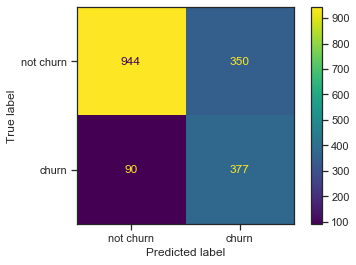

In [35]:
predictions = clf_xgb.predict(X_test)

print('acc: ', accuracy_score(y_test, predictions))
print('f1: ', f1_score(y_test, predictions))
print('recall: ', recall_score(y_test, predictions))
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['not churn', 'churn'])

## Conclusion

The best model (highest f1) is <b>XGBoost</b> with f1 = 0.63 and hyperparameter:
* gamma = 3
* learning_rate = 0.3
* max_depth = 2
* reg_lambda = 0.3
* scale_pos_weight = 3